実習12-2 自然言語処理の導入
---
前の実習で文を数値化することができ、ニューラルネットワークに入れる準備はできた。
今回は、Word Embeddingを含め、数値化された文をニューラルネットワークに入力し、教師あり学習を実施してみる。


# 1. ニューラルネットワークへの入力（練習用）
数列に変換した文字列をモデルに入力する際、Embedding層を利用して各単語を低次元のベクトルに変換することが多い。その後、出力まで処理を行う。今回の例では、文を2つのクラスに分類する問題を想定してモデルを作成してみる。

## 1-1. データの準備（練習用）
練習用として、簡単な入力文と出力を準備する。
* 入力する文章を準備する
```
# 入力文
sentences = [
    'I love my dog.',
    'I love my cat.',
    'You love my dog, too! I am happy.'
]
```

* 二値分類を想定して、出力を準備する。（練習用の値はダミー）
```
# 出力
import numpy as np
Y = np.array([0,0,1])
```



In [1]:
# 入力文
sentences = [
  'I love my dog.',
  'I love my cat.',
  'You love my dog, too! I am happy.'
]

In [2]:
# 出力
import numpy as np
Y = np.array([0,0,1])

## 1-2. 単語リストの作成（練習用）
Tokenizerで単語リストを作成する。
```
# ライブラリインポート
from tensorflow.keras.preprocessing.text import Tokenizer
# Tokenizerの作成
tokenizer = Tokenizer(num_words = 100, oov_token='<OOV>')
# fitで入力文を学習し、各単語にインデックスを割り当てる
tokenizer.fit_on_texts(sentences)
```

In [3]:
# ライブラリインポート
from tensorflow.keras.preprocessing.text import Tokenizer

# Tokenizerの作成
tokenizer = Tokenizer(num_words = 100, oov_token='<OOV>')

# fitで入力文を学習し、各単語にインデックスを割り当てる
tokenizer.fit_on_texts(sentences)

### 1-3. 文章を数値リストに変換
文章をKerasモデルに入力できるように、数値リストに変換し、長さを統一する。
```
# 数値リストに変換
sequences = tokenizer.texts_to_sequences(sentences)
# 長さを統一
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences_padded = pad_sequences(sequences, maxlen=10, padding='post', truncating='post')
```


In [4]:
# 数値リストに変換
sequences = tokenizer.texts_to_sequences(sentences)
# 長さを統一
from tensorflow.keras.preprocessing.sequence import pad_sequences
sequences_padded = pad_sequences(sequences, maxlen=10, padding='post', truncating='post')

In [5]:
# 表示して確認してもよい
sequences_padded

array([[ 2,  3,  4,  5,  0,  0,  0,  0,  0,  0],
       [ 2,  3,  4,  6,  0,  0,  0,  0,  0,  0],
       [ 7,  3,  4,  5,  8,  2,  9, 10,  0,  0]], dtype=int32)

## 1-4. Kerasモデルの作成
長さが同じ数値リストに変換でき、モデルの入力準備ができたので、次にモデルを作成する。

数列に変換した文字列をモデルに入力する際、Embedding層を利用して各単語を低次元のベクトルに変換することが多い。その後、いくつかの層を経由して出力まで処理を行う。この際の注意点をまとめておく。
* 入力層：```shape```で、数値リストの長さを指定<br>（```pad_sequences```の```maxlen```と一致させる）

* Embedding層：
 * ```input_dim```に指定する```vocab_size```は、単語数と一致させる。（Tokenizerのnum_words）
 * ```output_dim```に指定する```embedding_dim```は、ここで初めて設定する。


```
# Embedding層で使用するパラメータ
vocab_size =  # 単語数。上のnum_wordsと合わせる
embedding_dim = 4 # 単語埋め込みの次元（ここでは4にしておく）
max_length =  # 文の最大長、paddingのmaxlenに合わせる。

# モデル作成
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, GlobalAveragePooling1D, Dense
model = tf.keras.Sequential([
    Input(shape=(max_length,)),
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    GlobalAveragePooling1D(), # どこかで何らかの方法で1次元にする
    Dense(8, activation='relu'),
    Dense(出力ノード数, activation='活性化関数') # 二値分類を想定すると何を設定しますか
])

# モデルの形状を確認
model.summary()

```

In [7]:
# Embedding層で使用するパラメータ
vocab_size = 100    # 単語数。上のnum_wordsと合わせる
embedding_dim = 4   # 単語埋め込みの次元（ここでは4にしておく）
max_length =  10    # 文の最大長、paddingのmaxlenに合わせる。

# モデル作成
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, GlobalAveragePooling1D, Dense
model = tf.keras.Sequential([
    Input(shape=(max_length,)),
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    GlobalAveragePooling1D(), # どこかで何らかの方法で1次元にする
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid') # 二値分類を想定すると何を設定しますか
])

# モデルの形状を確認
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 10, 4)               │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 4)                   │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 449 (1.75 KB)

 Trainable params: 449 (1.75 KB)

 Non-trainable params: 0 (0.00 B)

モデルが使用できるようにコンパイルする。また、二値分類ができるようにダミーの出力Yを作成しておく。

```
# コンパイル
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 学習（今回はエラーが出なければOK）
model.fit(sequences_padded, Y)
```

In [8]:
# コンパイル
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 学習（今回はエラーが出なければOK）
model.fit(sequences_padded, Y)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.3333 - loss: 0.6941


# 2. ニュース記事の分類問題（課題）
次に、ニュース記事に皮肉が含まれているかどうかを分類するモデルを作成してみる。


## 2-1. データの準備
まずは、json形式のデータをダウンロードし、モデルへの入力（ニュース記事）と出力（皮肉が含まれているかどうか）を準備する。
```
# データセットのダウンロード
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

# 入力と出力の準備
## jsonファイルの読み込み
import json
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

## リストの作成
sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

print(len(sentences), len(labels))
```


In [9]:
# データセットのダウンロード
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

# 入力と出力の準備
## jsonファイルの読み込み
import json
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

## リストの作成
sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

print(len(sentences), len(labels))

--2025-01-09 02:22:05--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.207, 173.194.210.207, 173.194.212.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2025-01-09 02:22:05 (104 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]

26709 26709


一部のデータを表示して確認してもよい。

In [24]:
# 一部のデータを表示して確認してもよい
print(sentences[:3])

print(labels[0])

["former versace store clerk sues over secret 'black code' for minority shoppers", "the 'roseanne' revival catches up to our thorny political mood, for better and worse", "mom starting to fear son's web series closest thing she will have to grandchild"]
0


train_test_split関数を使用して、訓練用とテスト用に分割する。
* テスト用データを全体の25%に設定する。
* 引数stratifyを正しく指定する。
* random_stateに学籍番号を指定する。

In [29]:
# 訓練用とテスト用に分割
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.25, stratify=labels, random_state=2220042)

### 2-2. Tokenizerの作成
Tokenizerを作成する。**num_wordsは10000を指定すること。**


In [48]:
# ライブラリのインポート（上で実施済みであれば不要）

# Tokenizerの作成
tokenizer = Tokenizer(num_words = 10000, oov_token='<OOV>')

### 2-3. 単語リストの作成
訓練用データの入力文と、fit_on_textsを使用して、単語リストを作成する。<br/>
**※ 訓練用データのみを使用してリストを作成すること**

In [49]:
# 単語リストの作成
tokenizer.fit_on_texts(x_train)

### 2-4. 文を数値リストに変換
訓練用、テスト用の文をそれぞれ数値の列に変換し、パディングにより長さを揃える。

**今回はmaxlenを32にしてみる。**

In [50]:
# 訓練用入力を数値化してpadding
sequences = tokenizer.texts_to_sequences(x_train)
sequences_padded = pad_sequences(sequences, maxlen=32, padding='post', truncating='post')

# テスト用入力を数値化してpadding
sequences_test = tokenizer.texts_to_sequences(x_test)
sequences_test_padded = pad_sequences(sequences_test, maxlen=32, padding='post', truncating='post')

出力ラベルをnp.arrayに変換しておこう。

```
# 出力ラベルをnp.arrayに型変換しておく
訓練用ラベル = np.array(訓練用ラベル)
テスト用ラベル = np.array(テスト用ラベル)
```

In [51]:
# 出力ラベルをnp.arrayに型変換しておく
y_train = np.array(y_train)
y_test = np.array(y_test)

### 2-4. ニューラルネットワークの作成
モデルを作成する。
以下を正しく指定すること
* 入力層のshape
* Embedding層のinput_dim,
* Embedding層のoutput_dim（埋め込みの次元。今回は16などを指定する。）
* 出力層のノード数と活性化関数


In [64]:
# モデルの作成
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, GlobalAveragePooling1D, Dense
model = tf.keras.Sequential([
    Input(shape=(32,)),
    Embedding(input_dim=100000, output_dim=32),
    GlobalAveragePooling1D(),
    Dense(8000, activation='relu'),
    Dense(800, activation='relu'),
    Dense(80, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# summary
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ (None, 32, 32)              │       3,200,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_8           │ (None, 32)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 8000)                │         264,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 800)                 │       6,400,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 80)                  │          64,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 8)                   │             648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,929,555 (37.88 MB)

 Trainable params: 9,929,555 (37.88 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
# モデルのコンパイル
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### 2-5. 学習と検証
fitを使用して学習する。学習時に、fitの引数として、validation_data=(テスト用入力, テスト用出力)を指定しておくと、各エポック終了時のテスト用データに対する性能も計算してくれる。まずはepoch数5ぐらいで試すとよい。

```
hist = モデル名.fit(訓練用入力, 訓練用出力,validation_data=(テスト用入力, テスト用出力), epochs=エポック数)
```

In [66]:
# fitによる学習と検証
hist = model.fit(sequences_padded, y_train, validation_data=(sequences_test_padded, y_test), epochs=10)

ValueError: You must call `compile()` before using the model.

In [57]:
# 一部の結果を表示して確認してもよい
hist

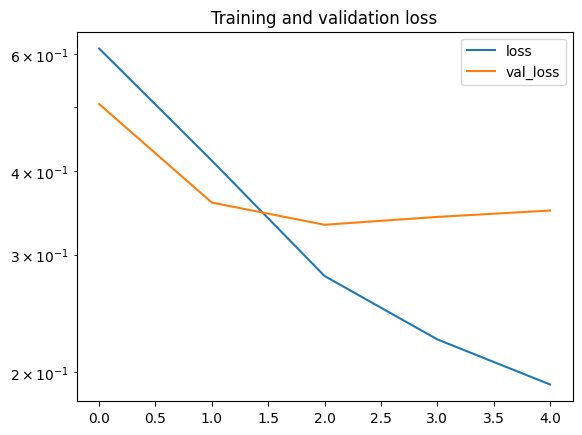

<Figure size 640x480 with 0 Axes>

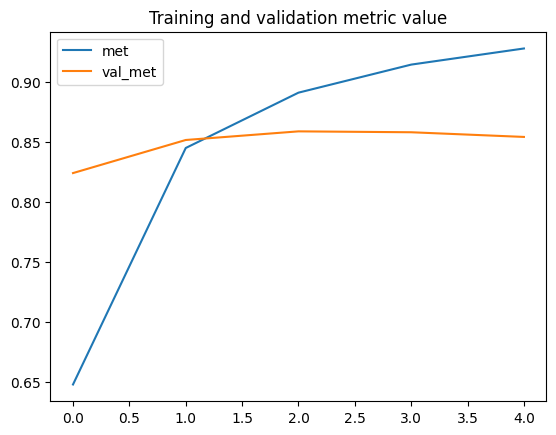

<Figure size 640x480 with 0 Axes>

In [58]:
# このまま実行する
import matplotlib.pyplot as plt

# 後のために、グラフを表示する関数を作成しておく
def plot_graphs(hist, metric):

  # ----------------------------
  # 各epochでの誤差と精度を取得
  # ----------------------------
  met      = hist.history[     metric ]
  val_met  = hist.history[ 'val_'+metric ]
  loss     = hist.history[    'loss' ]
  val_loss = hist.history['val_loss' ]

  epochs   = range(len(met)) # Get number of epochs

  # ---------------------------------------------
  # エポック数に対する誤差を表示（片対数グラフ）
  # --------------------------------------------
  plt.plot  ( epochs,     loss, label='loss')
  plt.plot  ( epochs, val_loss, label='val_loss')
  plt.title ('Training and validation loss'   )
  plt.legend()
  plt.yscale('log')
  plt.figure()
  plt.show()

  # ------------------------------------------------
  # エポック数に対するメトリックの値を表示
  # ------------------------------------------------
  plt.plot  ( epochs,     met, label='met' )
  plt.plot  ( epochs, val_met, label='val_met')
  plt.title ('Training and validation metric value')
  plt.legend()
  plt.figure()
  plt.show()


# accuracyグラフ描画
plot_graphs(hist, 'accuracy')

**[課題] 訓練用データとテスト用データに対する精度について、上記の結果から分かることを書いてください。**

[回答]　過学習した、テスト精度が低い

# 提出について

以下をチェックしてもらうこと
*   作成したモデルのパラメータが適切に設定されている
*   エラーなく学習ができている（fit）

ファイルが保存されているかを確認し、「ファイル＞ダウンロード＞.ipynbをダウンロード」を順にクリックして.ipynbファイルをダウンロードする。

ダウンロードしたipynbファイルを指定の場所に提出してください。